In [32]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [33]:
# Importação dos dados
df = pd.read_csv('cte2018.csv', sep=';', decimal=',')


In [34]:
plt.style.use('ggplot') # estilo do matplot lib
pd.options.display.float_format = '{:.2f}'.format # formato ponto flutuante dois pontos depois da vírgula


In [14]:
df.info() #informações do dataframe (80.970 entradas, 55 colunas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80970 entries, 0 to 80969
Data columns (total 55 columns):
Nº conhec.                         80970 non-null int64
Data emissão                       80970 non-null object
Mercadoria                         80970 non-null object
Mercadoria grupo                   80970 non-null object
Motorista                          80970 non-null object
Km rota                            80970 non-null object
CNPJ/CPF do remetente              80970 non-null int64
Razão social do remetente          80970 non-null object
Município do remetente             80970 non-null object
Placa                              80771 non-null object
Placa tração                       80970 non-null object
CNPJ/CPF do destinatário           80970 non-null int64
Razão social do destinatário       80970 non-null object
Município do destinatário          80970 non-null object
Logradouro da coleta               80970 non-null object
Bairro da coleta                   8097

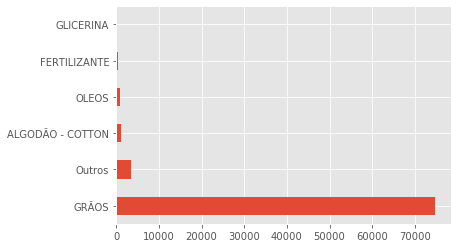

In [130]:
# Agrupar por "Mercadoria grupo"
df["Mercadoria grupo"].value_counts().plot.barh()
plt.show()


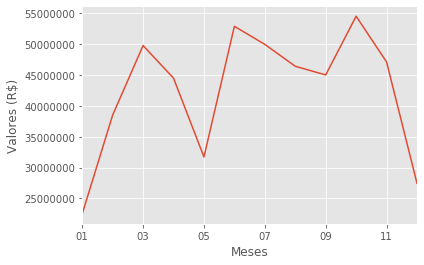

In [114]:
# Agrupar os valores de conhecimento por Mes.
df['date'] = pd.to_datetime(df['Data emissão']) #conversão de tipos de coluna
df['Total do conhec.'] = pd.to_numeric(df['Total do conhec.'])#conversão de tipos de coluna
valor_de_conhecimento_por_mes = df.groupby(df['date'].dt.strftime('%m'))['Total conhecido'].sum() # guardar em uma variável
valor_de_conhecimento_por_mes.plot() # ver a variável
plt.ticklabel_format(style='plain', axis='y')
plt.grid('on', which='minor', axis='x')
plt.grid('off', which='major', axis='x')
plt.xlabel('Meses')
plt.ylabel('Valores (R$)')
plt.show()



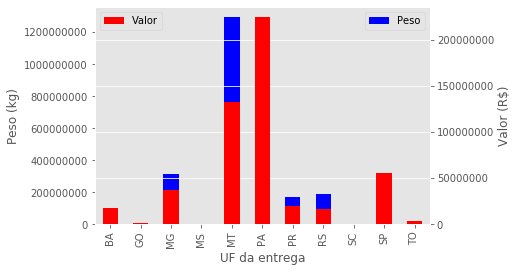

In [115]:
# Agrupar os valores por "UF da entrega"
df['Peso carregado'] = pd.to_numeric(df['Peso carregado']) #conversão de tipos de coluna
ax1 = df.groupby(["UF da entrega"])["Peso carregado"].agg('sum').plot(color='blue', grid=True, label='Peso', kind="bar")
ax2 = df.groupby(["UF da entrega"])["Total do conhec."].agg('sum').plot(color='red', secondary_y=True, label='Valor', kind="bar")
ax1.legend(loc=1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylabel('Peso (kg)')
ax2.legend(loc=2)
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylabel('Valor (R$)')

plt.grid('on', which='minor', axis='x')
plt.grid('off', which='major', axis='x')
plt.xlabel('Estados Entrega')
plt.show()

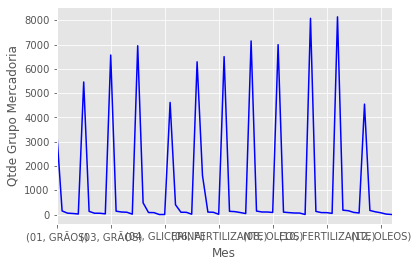

In [129]:
# Agrupar "Mercadoria grupo" por "Mes"

df['date'] = pd.to_datetime(df['Data emissão'])
df.groupby([df['date'].dt.strftime('%m')])["Mercadoria grupo"].value_counts().plot(color='blue', grid=True, label='Peso')
plt.ticklabel_format(style='plain', axis='y')
plt.grid('on', which='minor', axis='x')
#plt.grid('off', which='major', matplotlib.ticker as tkraxis='x')
plt.xlabel('Mes')
plt.ylabel('Qtde Grupo Mercadoria')
plt.show()


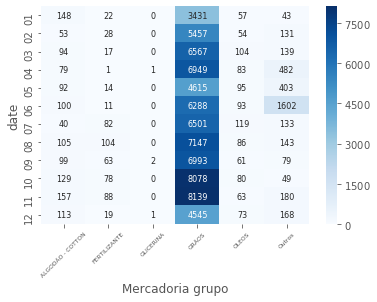

In [104]:
df['date'] = pd.to_datetime(df['Data emissão'])
df['date'] = df['date'].dt.strftime('%m')
piv = pd.pivot_table(df, index=['date'], columns=['Mercadoria grupo'], aggfunc='size', fill_value=0)

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)

sns.heatmap(piv, annot=True, annot_kws={"size": 8}, cmap='Blues', fmt='.12g', cbar_kws={'format': formatter})

plt.xticks(fontsize=6, rotation=45)
plt.show()

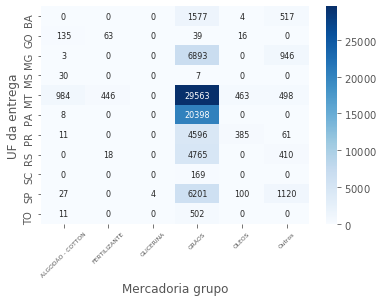

In [111]:
# Agrupar "Mercadoria grupo" por "UF da entrega"
piv = pd.pivot_table(df, index=['UF da entrega'], columns=['Mercadoria grupo'], aggfunc='size', fill_value=0)
#
formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
#
sns.heatmap(piv, annot=True, annot_kws={"size": 8}, cmap='Blues', fmt='.12g', cbar_kws={'format': formatter})
#
plt.xticks(fontsize=6, rotation=45)
plt.show()


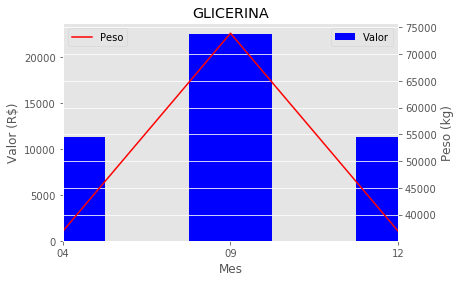

In [116]:
# Agrupar valor por "Mes" - Grupo Glicerina
df['date'] = pd.to_datetime(df['Data emissão'])
ax1 = df[df['Mercadoria grupo'] == 'GLICERINA'].groupby([df['date'].dt.strftime('%m')])["Total do conhec."].agg('sum').plot(color='blue', grid=True, label='Valor', kind="bar")
ax2 = df[df['Mercadoria grupo'] == 'GLICERINA'].groupby([df['date'].dt.strftime('%m')])["Peso carregado"].agg('sum').plot(color='red', secondary_y=True, label='Peso')

ax1.legend(loc=1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylabel('Valor (R$)')
ax1.set_xlabel('Mes')
ax2.legend(loc=2)
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylabel('Peso (kg)')

plt.grid('on', which='minor', axis='x')
plt.grid('off', which='major', axis='x')
plt.xlabel('Mes')
plt.title('GLICERINA')
plt.show()


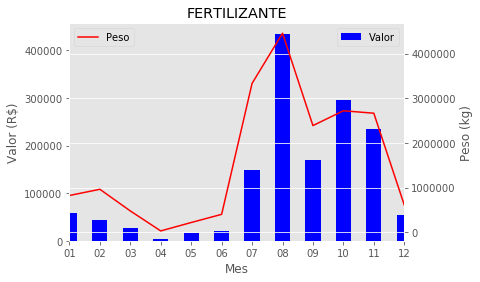

In [118]:
# Agrupar valor por "Mes" - Grupo Fertilizante
df['date'] = pd.to_datetime(df['Data emissão'])
ax1 = df[df['Mercadoria grupo'] == 'FERTILIZANTE'].groupby([df['date'].dt.strftime('%m')])["Total do conhec."].agg('sum').plot(color='blue', grid=True, label='Valor', kind="bar")
ax2 = df[df['Mercadoria grupo'] == 'FERTILIZANTE'].groupby([df['date'].dt.strftime('%m')])["Peso carregado"].agg('sum').plot(color='red', secondary_y=True, label='Peso')
#
ax1.legend(loc=1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylabel('Valor (R$)')
ax1.set_xlabel('Mes')
ax2.legend(loc=2)
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylabel('Peso (kg)')
plt.grid('on', which='minor', axis='x')
plt.grid('off', which='major', axis='x')
plt.xlabel('Mes')
plt.title('FERTILIZANTE')
plt.show()


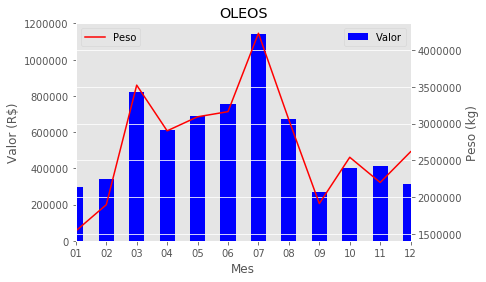

In [119]:
# Agrupar valor por "Mes" - Grupo Oleos
df['date'] = pd.to_datetime(df['Data emissão'])
ax1 = df[df['Mercadoria grupo'] == 'OLEOS'].groupby([df['date'].dt.strftime('%m')])["Total do conhec."].agg('sum').plot(color='blue', grid=True, label='Valor', kind="bar")
ax2 = df[df['Mercadoria grupo'] == 'OLEOS'].groupby([df['date'].dt.strftime('%m')])["Peso carregado"].agg('sum').plot(color='red', secondary_y=True, label='Peso')
#
ax1.legend(loc=1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylabel('Valor (R$)')
ax1.set_xlabel('Mes')
ax2.legend(loc=2)
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylabel('Peso (kg)')

plt.grid('on', which='minor', axis='x')
plt.grid('off', which='major', axis='x')
plt.xlabel('Mes')
plt.title('OLEOS')
plt.show()


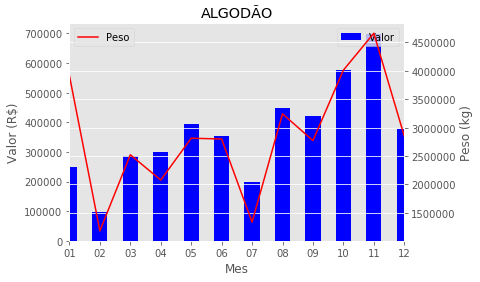

In [120]:
# Agrupar valor por "Mes" - Grupo Algodão
df['date'] = pd.to_datetime(df['Data emissão'])
ax1 = df[df['Mercadoria grupo'] == 'ALGODÃO - COTTON'].groupby([df['date'].dt.strftime('%m')])["Total do conhec."].agg('sum').plot(color='blue', grid=True, label='Valor', kind="bar")
ax2 = df[df['Mercadoria grupo'] == 'ALGODÃO - COTTON'].groupby([df['date'].dt.strftime('%m')])["Peso carregado"].agg('sum').plot(color='red', secondary_y=True, label='Peso')

ax1.legend(loc=1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylabel('Valor (R$)')
ax1.set_xlabel('Mes')
ax2.legend(loc=2)
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylabel('Peso (kg)')

plt.grid('on', which='minor', axis='x')
plt.grid('off', which='major', axis='x')
plt.xlabel('Mes')
plt.title('ALGODÃO')
plt.show()

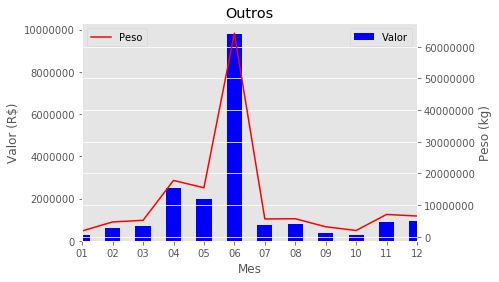

In [121]:
# Agrupar valor por "Mes" - Grupo Outros
df['date'] = pd.to_datetime(df['Data emissão'])
ax1 = df[df['Mercadoria grupo'] == 'Outros'].groupby([df['date'].dt.strftime('%m')])["Total do conhec."].agg('sum').plot(color='blue', grid=True, label='Valor', kind="bar")
ax2 = df[df['Mercadoria grupo'] == 'Outros'].groupby([df['date'].dt.strftime('%m')])["Peso carregado"].agg('sum').plot(color='red', secondary_y=True, label='Peso')

ax1.legend(loc=1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylabel('Valor (R$)')
ax1.set_xlabel('Mes')
ax2.legend(loc=2)
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylabel('Peso (kg)')

plt.grid('on', which='minor', axis='x')
plt.grid('off', which='major', axis='x')
plt.xlabel('Mes')
plt.title('Outros')
plt.show()


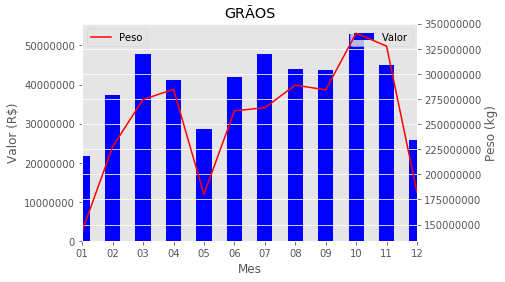

In [122]:
# Agrupar valor por "Mes" - Grupo Grãos
df['date'] = pd.to_datetime(df['Data emissão'])
ax1 = df[df['Mercadoria grupo'] == 'GRÃOS'].groupby([df['date'].dt.strftime('%m')])["Total do conhec."].agg('sum').plot(color='blue', grid=True, label='Valor', kind="bar")
ax2 = df[df['Mercadoria grupo'] == 'GRÃOS'].groupby([df['date'].dt.strftime('%m')])["Peso carregado"].agg('sum').plot(color='red', secondary_y=True, label='Peso')

ax1.legend(loc=1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylabel('Valor (R$)')
ax1.set_xlabel('Mes')
ax2.legend(loc=2)
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylabel('Peso (kg)')

plt.grid('on', which='minor', axis='x')
plt.grid('off', which='major', axis='x')
plt.xlabel('Mes')
plt.title('GRÃOS')
plt.show()

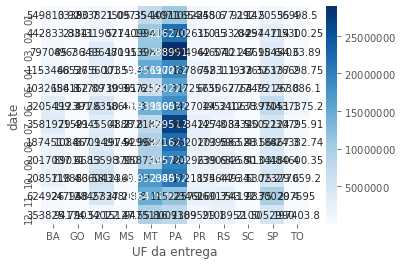

In [123]:
# mapa de calor entre duas colunas
df['date'] = pd.to_datetime(df['Data emissão'])
df1 = df.groupby([df['date'].dt.strftime('%m'), "UF da entrega"])["Total do conhec."].agg('sum').reset_index()

piv = pd.pivot_table(df1, values='Total do conhec.', index=['date'], columns='UF da entrega', fill_value=0)

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)

sns.heatmap(piv, annot=True, cmap='Blues', fmt='.8g', cbar_kws={'format': formatter})

plt.show()

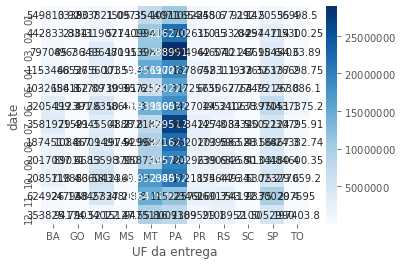

In [124]:
# mapa de calor entre Mes/UF/Valor(R$)
df['date'] = pd.to_datetime(df['Data emissão'])
df1 = df.groupby([df['date'].dt.strftime('%m'), "UF da entrega"])["Total do conhec."].agg('sum').reset_index()

piv = pd.pivot_table(df1, values='Total do conhec.', index=['date'], columns=['UF da entrega'], fill_value=0)

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)

sns.heatmap(piv, annot=True, cmap='Blues', fmt='.8g', cbar_kws={'format': formatter})

plt.show()

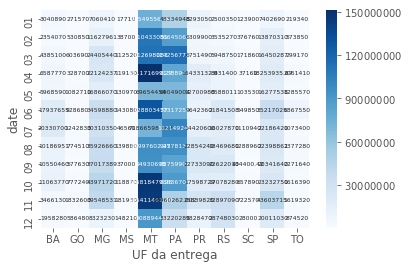

In [125]:
# mapa de calor entre Mes/UF/Peso(kg)
df['date'] = pd.to_datetime(df['Data emissão'])
df1 = df.groupby([df['date'].dt.strftime('%m'), "UF da entrega"])["Peso carregado"].agg('sum').reset_index()

piv = pd.pivot_table(df1, values='Peso carregado', index=['date'], columns=['UF da entrega'], fill_value=0)

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)

sns.heatmap(piv, annot=True, annot_kws={"size": 6}, cmap='Blues', fmt='.12g', cbar_kws={'format': formatter})

plt.show()

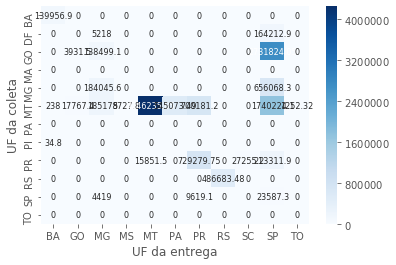

In [128]:
# pedagio por grupo de mercadoria
# mapa de calor entre coleta x entrega x pedagio
df['Pedágio'] = pd.to_numeric(df['Pedágio']) #conversão de tipos de coluna
df1 = df.groupby(['UF da coleta', 'UF da entrega'])['Pedágio'].agg('sum').reset_index()

piv = pd.pivot_table(df1, values='Pedágio', index=['UF da coleta'], columns=['UF da entrega'], fill_value=0)

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)

sns.heatmap(piv, annot=True, annot_kws={"size": 8}, cmap='Blues', fmt='.12g', cbar_kws={'format': formatter})
plt.show()